In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import os
import json
from pathlib import Path

In [2]:
def func(object_name):
    if "." in object_name:
        return False
    else:
        return True

In [5]:
E = 1
R = 100
N = 100
dataset = "cifar10"
alpha = 0.1

folder_path = f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/E{E}/R{R}"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)
algos

['fedavg', 'feddyn', 'fednova', 'fedprox', 'scaffold']

### Global Accuracy

In [6]:
data = {algo: [] for algo in algos}
for algo in algos:
    global_cfmtx = json.load(open(os.path.join(folder_path, algo, "global_cfmtx_record.json"), "r"))
    for r in range(len(global_cfmtx)):
        data[algo].append(np.mean(np.diag(global_cfmtx[r])))
        
# fim = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "fim", "results.json"), "r"))
# sset = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "singleset", "results.json"), "r"))

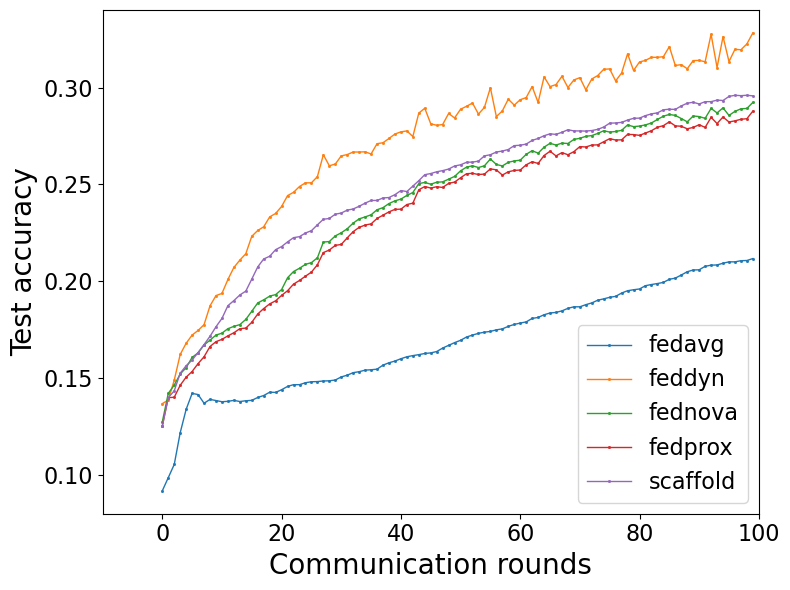

In [7]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(8,6))
plt.xlabel("Communication rounds", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

for algo in data.keys():
    plt.plot(data[algo], label=algo.replace("_", " "),
            linestyle='solid', marker='s',
            linewidth=1, markersize=1)
    
# plt.ylim(0.1,1)
plt.xlim(-10,R)
plt.legend(loc="lower right", fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig(os.path.join(*folder_path.split('/')[:-2], "summarise.png"))

### FIM analysis

In [8]:
E = 1
R = 100
N = 100
dataset = "cifar10"
alpha = 0.1

folder_path = f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/E{E}/R{R}"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)
algos

['fedavg', 'feddyn', 'fednova', 'fedprox', 'scaffold']

In [10]:
import pandas as pd

data = {}
for algo in algos:
    fim_data = json.load(open(os.path.join(folder_path, algo, "fim.json"), "r"))
    data[algo.replace('_', '+')] = []
    for r in range(len(global_cfmtx)):
        data[algo.replace('_', '+')] = fim_data
        
# fim = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "fim", "results.json"), "r"))
# sset = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "singleset", "results.json"), "r"))

df = pd.DataFrame(data)
# df.index = pd.Index(['origin', '+fim'])

# df['fim'] = [fim['centroid'], fim['fim']]
df

,fedavg,feddyn,fednova,fedprox,scaffold
origin,0.2117,0.3282,0.2923,0.2878,0.2957
+fim,0.2780,0.3478,0.3314,0.3382,0.3387


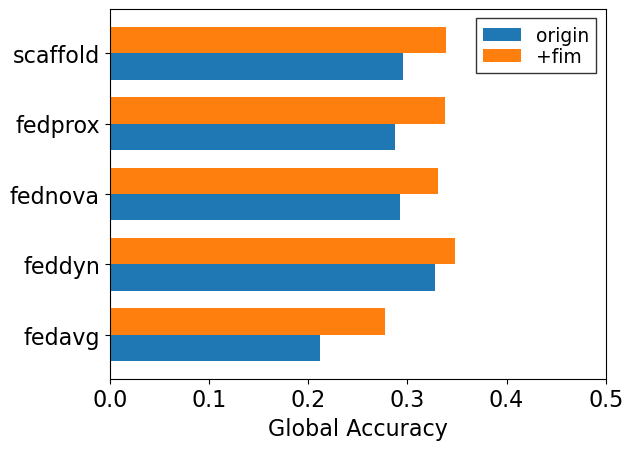

In [32]:
ax = df.T.plot.barh(width=0.75)
ax.set_xlabel("Global Accuracy", fontdict={'fontsize': 16})
ax.set_xlim(0, 0.5)
ax.legend(fontsize=13.5, fancybox=False, labelspacing=0.1, edgecolor='black')